**Simple House Price Prediction Model**
<br>In this notebook, I implement a simple linear regression model using a neural-network approach in PyTorch to predict house prices based on square footage. The dataset used is synthetically generated. This exercise is intended to build intuition about how linear regression works and how it can be implemented using PyTorch.

Dataset generation

In [92]:
#generate random data for house price
from sklearn.datasets import make_regression
import numpy as np
X,y =make_regression(n_samples=100, n_features=1, noise=20)
#Casting it to default pytorch dtypr
X,y = X.astype(np.float32), y.astype(np.float32)

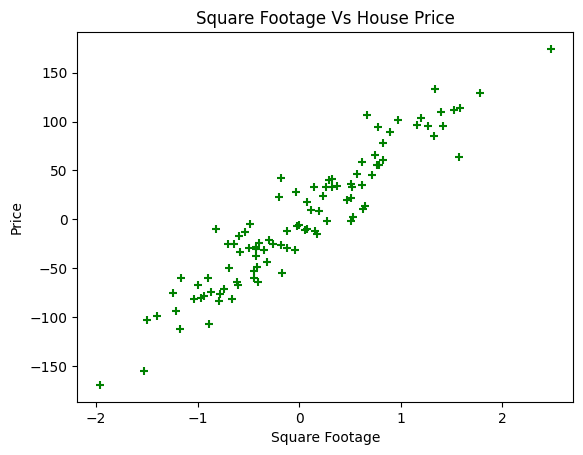

In [93]:
#Plotting House price Vs Square Footage
import matplotlib.pyplot as plt
plt.scatter(X,y, label='Original Data' , marker='+', color='green')
plt.title('Square Footage Vs House Price')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()

In [94]:
import torch
X_tensor = torch.from_numpy(X)
y_tensor = torch.from_numpy(y).reshape(-1,1)

Linear Regression Model

In [95]:
#Define the Linear Regression model
import torch.nn as nn
class LRModel(nn.Module):
  def __init__(self) -> None:
    super(LRModel, self).__init__()
    self.linear= nn.Linear(1,1)#nn.Linear(in_features, out_features)

  def forward(self, x):
    return self.linear(x)

In [96]:
model = LRModel()

Mean Square Loss and Stochastic Gradient Descent (SGD) optimisation algorithm

In [97]:
#Define the loss function and Optimiser
import torch.optim as optim
criterion = nn.MSELoss()
optimiser = optim.SGD(model.parameters(), lr=0.01)

In [98]:
num_epochs =200
losses =[]

In [99]:
#Define training loop
for epochs in range(num_epochs):

  #Forward pass
  outputs = model(X_tensor)
  loss = criterion(outputs, y_tensor)
  losses.append(loss.item())

  #Backward pass
  optimiser.zero_grad()
  loss.backward()
  optimiser.step()

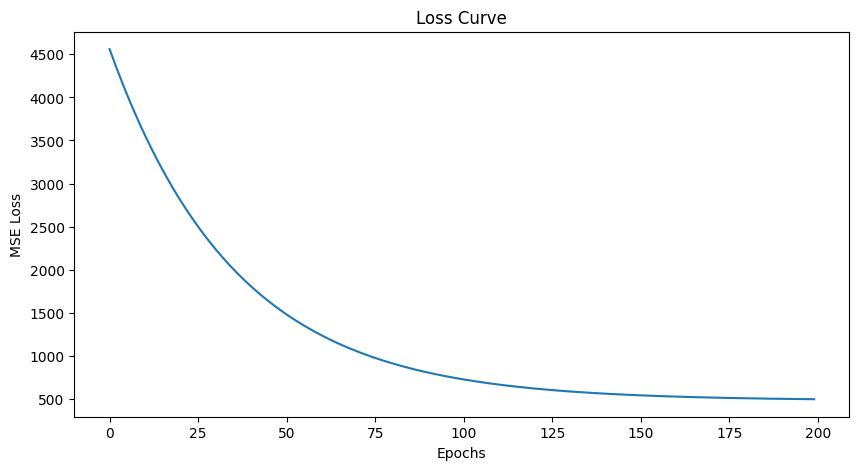

In [100]:
plt.figure(figsize=(10,5))
plt.plot(losses)
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show()

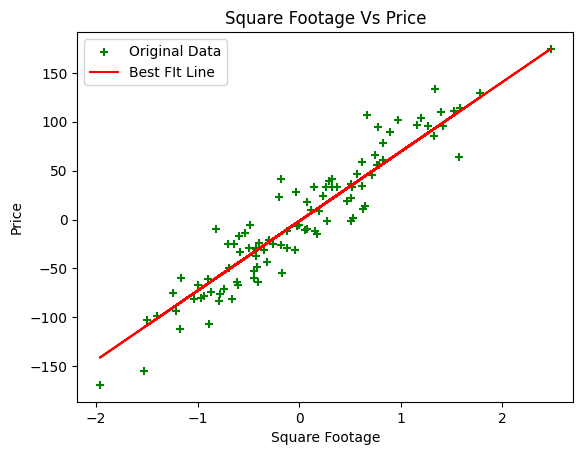

In [103]:
with torch.no_grad():
  predicted = model(X_tensor).numpy()

plt.scatter(X,y, label='Original Data', marker='+', color='green')
plt.plot(X,predicted,color='red', label='Best FIt Line')
plt.title('Square Footage Vs Price')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.legend()
plt.show()

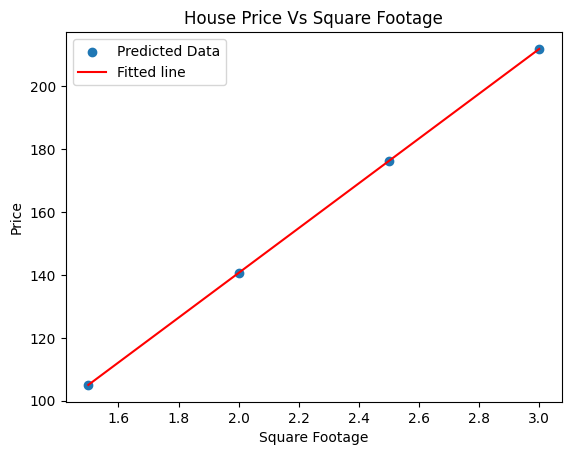

In [105]:
#Testing
test_data = np.array([[1.5], [2.0], [2.5], [3.0]], dtype=np.float32)
test_tensor = torch.from_numpy(test_data)

with torch.no_grad():
  predicted_data = model(test_tensor).numpy()

plt.scatter(test_data, predicted_data, label='Predicted Data')
plt.plot(test_data,predicted_data,color='red', label='Fitted line')
plt.title('House Price Vs Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.legend()
plt.show()